In [67]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# --- 1. Definindo as classes (rótulos) ---
# Vamos imaginar um problema de classificação binária (duas classes: 0 e 1)
# Por exemplo, "não-doente" (0) e "doente" (1)
classes = [0, 1]
num_samples = 1000 # Número total de amostras (previsões/reais)

In [69]:
# --- 2. Gerando rótulos reais aleatórios ---
y_true = np.random.randint(0, len(classes), num_samples)

In [70]:
# --- 3. Gerando previsões aleatórias do modelo ---
y_pred = np.copy(y_true)
np.random.shuffle(y_pred)
num_errors = int(0.05 * num_samples)
error_indices = np.random.choice(num_samples, num_errors, replace=False)
for i in error_indices:
    y_pred[i] = 1 - y_pred[i]

In [71]:
# --- 4. Calculando a Matriz de Confusão ---
cm = confusion_matrix(y_true, y_pred)

print("--- Rótulos Reais (y_true) ---")
print(y_true)
print("\n--- Previsões do Modelo (y_pred) ---")
print(y_pred)
print("\n--- Matriz de Confusão Gerada ---")
print(cm)


--- Rótulos Reais (y_true) ---
[1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1
 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0
 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0
 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0
 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1
 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0
 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1
 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0
 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1
 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 

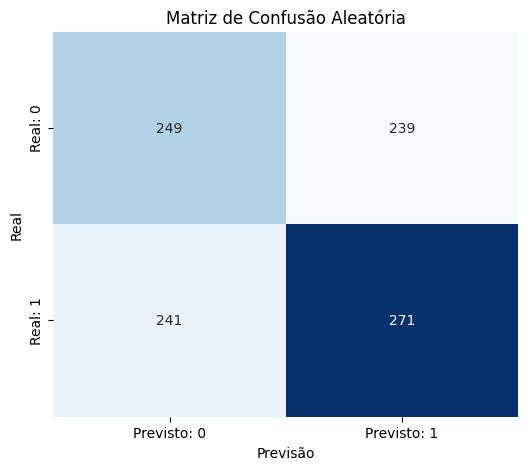

In [72]:
# --- 5. Visualizando a Matriz de Confusão ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[f'Previsto: {c}' for c in classes],
            yticklabels=[f'Real: {c}' for c in classes])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão Aleatória')
plt.show()

In [73]:
# --- 6. Explicando os componentes da matriz ---
VN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
VP = cm[1, 1]

print("\n--- Interpretação da Matriz de Confusão (para classes 0 e 1) ---")
print(f"Verdadeiros Negativos (VN) [Real: 0, Previsto: 0]: {VN}")
print(f"Falsos Positivos (FP)      [Real: 0, Previsto: 1]: {FP}")
print(f"Falsos Negativos (FN)      [Real: 1, Previsto: 0]: {FN}")
print(f"Verdadeiros Positivos (VP) [Real: 1, Previsto: 1]: {VP}")

sensibilidade = VP / (VP + FN)
especificidade = VN / (FP + VN)
acuracia = (VP + VN) / num_samples
precisao = VP / (VP + FP)
f1_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)

print("\n--- Resumo ---")
print(f"Total de amostras: {num_samples}")
print(f"Sensibilidade: {sensibilidade:.2f}")
print(f"Especificidade: {especificidade:.2f}")
print(f"Acurácia: {acuracia:.2f}")
print(f"Precisão: {precisao:.2f}")
print(f"F1-Score: {f1_score:.2f}")


--- Interpretação da Matriz de Confusão (para classes 0 e 1) ---
Verdadeiros Negativos (VN) [Real: 0, Previsto: 0]: 249
Falsos Positivos (FP)      [Real: 0, Previsto: 1]: 239
Falsos Negativos (FN)      [Real: 1, Previsto: 0]: 241
Verdadeiros Positivos (VP) [Real: 1, Previsto: 1]: 271

--- Resumo ---
Total de amostras: 1000
Sensibilidade: 0.53
Especificidade: 0.51
Acurácia: 0.52
Precisão: 0.53
F1-Score: 0.53
